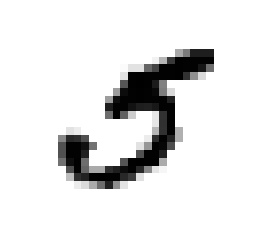

shuffle_indx [ 4535 53726 54532 ..., 19514 35012  8178]
len(shuffle_index) 60000
type(shuffle_index) <class 'numpy.ndarray'>


array([False], dtype=bool)

In [10]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

#split the test set and train set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]


import numpy as np
#产生60000个随机数，范围在0-60000里边
shuffle_index = np.random.permutation(60000)
print('shuffle_indx',shuffle_index)
print('len(shuffle_index)',len(shuffle_index))
print('type(shuffle_index)',type(shuffle_index))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#y=5 classifier
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#                                   TIP
#The SGDClassifier relies on randomness during training (hence the name
#“stochastic”). If you want reproducible results, you should set the random_state
#parameter.

sgd_clf.predict([some_digit])






#                             IMPLEMENTING CROSS-VALIDATION
Occasionally you will need more control over the cross-validation process than what
cross_val_score() and similar functions provide. In these cases, you can implement
cross-validation yourself; it is actually fairly straightforward. The following code does
roughly the same thing as the preceding cross_val_score() code, and prints the same
:    result:
        
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    skfolds = StratifiedKFold(n_splits=3, random_state=42)
    for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495
The StratifiedKFold class performs stratified sampling (as explained in Chapter 2) to
produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.9604
0.9498
0.9357


# meaure the perf of the model
# using cross_validation to measure the accuracy
:    from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")



In [21]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


# Confusing Matrix 

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53333,  1246],
       [ 1836,  3585]])

# Precision and Recall

In [44]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)
recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

0.74208238459946185